<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Double Pendulum and Chaotic Motion

### Examples - Mechanics
<section class="post-meta">
By Jonas Tjemsland, Eilif Sommer Øyre and Jon Andreas Støvneng
</section>
Last edited: April 15th 2018 
___

Simple non-linear differential equations can have complicated and chaotic solutions. In this notebook we will study the chaotic motion of the double pendulum. Even though the motion is chaotic, phase-space plots reveals a beautiful underlying order in the chaos.

The double pendulum is shown in figure [1](#im1). It consists of two simple pendulums, where the mass of the first pendulum is the pivot point for the second. We refer you to our notebook on the [simple pendulum](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/simple_pendulum.ipynb) for a quick introduction. Let $m_i$ and $L_i$ be the mass and the length of the $i$th simple pendulum, respectively. $\theta_1$ is the angle between the vertical direction and the first pendulum, and $\theta_2$ is the angle between the vertical direction and the second, as shown in the figure. Note that there is only two degrees of freedom, $\theta_1$ and $\theta_2$. However, this is enough to obtain a chaotic motion.

<a id="im1"></a>
<br />
![Double Pendulum](images/double_pendulum.png)
**Figure 1.** The double pendulum with masses $m_1$ and $m_2$, displacement angles $\theta_1$ and $\theta_2$ and lengths $L_1$ and $L_2$.
<br></br>

We start off by setting some plotting constants and importing needed packages.

In [7]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from numpy import cos, sin, arange, pi
import matplotlib.cm as cm
%matplotlib inline

figsize = 6
dpi = 600
g = 9.81     # [m/s^2]. Gravitational acceleration

## Motion of the Double Pendulum

The equations of motion can be written as (see [appendix](#apndx) for the derivation)

\begin{align}
\dot\omega_1 &= \frac{1}{L_1\xi}\left[L_1m_2c_{12}s_{12}\omega_1^2 + L_2m_2s_{12}\omega_2^2 - m_2gc_{12}s_2 + (m_1+m_2)gs_1 \right],\\
\dot\omega_2 &= \frac{1}{L_2\xi}\left[L_2m_2c_{12}s_{12}\omega_2^2 + L_1(m_1+m_2)s_{12}\omega_1^2+(m_1+m_2)gs_1c_{12} - (m_1+m_2)gs_2 \right],\\
\omega_1 &= \dot\theta_1,\\
\omega_2 &= \dot\theta_2,
\end{align}

where we have defined $c_{12} \equiv \cos(\theta_1-\theta_2)$, $s_{12} \equiv \sin(\theta_1-\theta_2)$, $s_i \equiv \sin(\theta_i)$ and $\xi \equiv c_{12}^2m_2-m_1-m_2$ in order to simplify the notation. Note that we have written the equations as four coupled first order ordinary differential equations, which means that we can easily solve the corresponding initial value problem using e.g. the Euler method or the 4th order Runge-Kutta method. In this notebook we will be using the integrator `odeint` from `scipy`. This function solves the initial value problem for stiff or non-stiff systems of first order ode-s. Check out [[1]](#rsc) to learn how it works. To use `odeint` we need to create a function that evaluates the right hand side of the equations of motion. It will also be convinient to define a function that transforms $\omega_1$,$\omega_2$, $\theta_1$ and $\theta_2$ into cartesian coordinates $\mathbf{v}_1$, $\mathbf{v}_2$, $\mathbf{x}_1$ and $\mathbf{x}_2$.

In [8]:
def RHS(z, t, L1, L2, m1, m2, g):
    """ Return the right hand side of the 
    ordinary differential equation describing
    the double pendulum.
    """
    theta1, w1, theta2, w2 = z
    cos12 = cos(theta1 - theta2)
    sin12 = sin(theta1 - theta2)
    sin1 = sin(theta1)
    sin2 = sin(theta2)
    xi = cos12**2*m2 - m1 - m2
    w1dot = ( L1*m2*cos12*sin12*w1**2 + L2*m2*sin12*w2**2
            - m2*g*cos12*sin2      + (m1 + m2)*g*sin1)/(L1*xi)
    w2dot = -( L2*m2*cos12*sin12*w2**2 + L1*(m1 + m2)*sin12*w1**2
            + (m1 + m2)*g*sin1*cos12  - (m1 + m2)*g*sin2 )/(L2*xi)
    return w1, w1dot, w2, w2dot

def to_cartesian(theta1, w1, theta2, w2, L1, L2):
    """ Transforms theta and omega to cartesian coordinates
    and velocities x1, y1, x2, y2, vx1, vy1, vx2, vy2
    """
    x1 = L1 * sin(theta1)
    y1 = -L1 * cos(theta1)
    x2 = x1 + L2 * sin(theta2)
    y2 = y1 - L2 * cos(theta2)
    vx1 = L1*cos(theta1)*w1
    vy1 = L1*sin(theta1)*w1
    vx2 = vx1 + L2*cos(theta2)*w2
    vy2 = vy1 + L2*sin(theta2)*w2
    return x1, y1, x2, y2, vx1, vy1, vx2, vy2

We now need to define the parameters in the setup. Play around with initial conditions and different parameters!

Here, we make the (arbitrary) choice $2L_1=L_2$ and $m_1=3m_2$, and we will let the pendulum swing for 50 seconds.

In [9]:
L1, L2 = 1., 2.
m1, m2 = 3., 1.

z0 = [pi/2, 0, pi/2, 0]
tmax, dt = 50, 0.01
t = arange(0, tmax+dt, dt)

We are now ready to perform the simulation and transform the results to cartesian coordinates.

In [10]:
# Perform simulation
z = odeint(RHS, z0, t, args=(L1, L2, m1, m2, g))

# Extract result
theta1, w1, theta2, w2 = z[:,0], z[:,1], z[:,2], z[:,3]
x1, y1, x2, y2, vx1, vy1, vx2, vy2 = to_cartesian(theta1, w1, theta2, w2, L1, L2)

We can now plot the results and create an animation! To this end, we created the functions `plot_position()` and `create_animation()`, which are shown in the [appendix](#apndx).

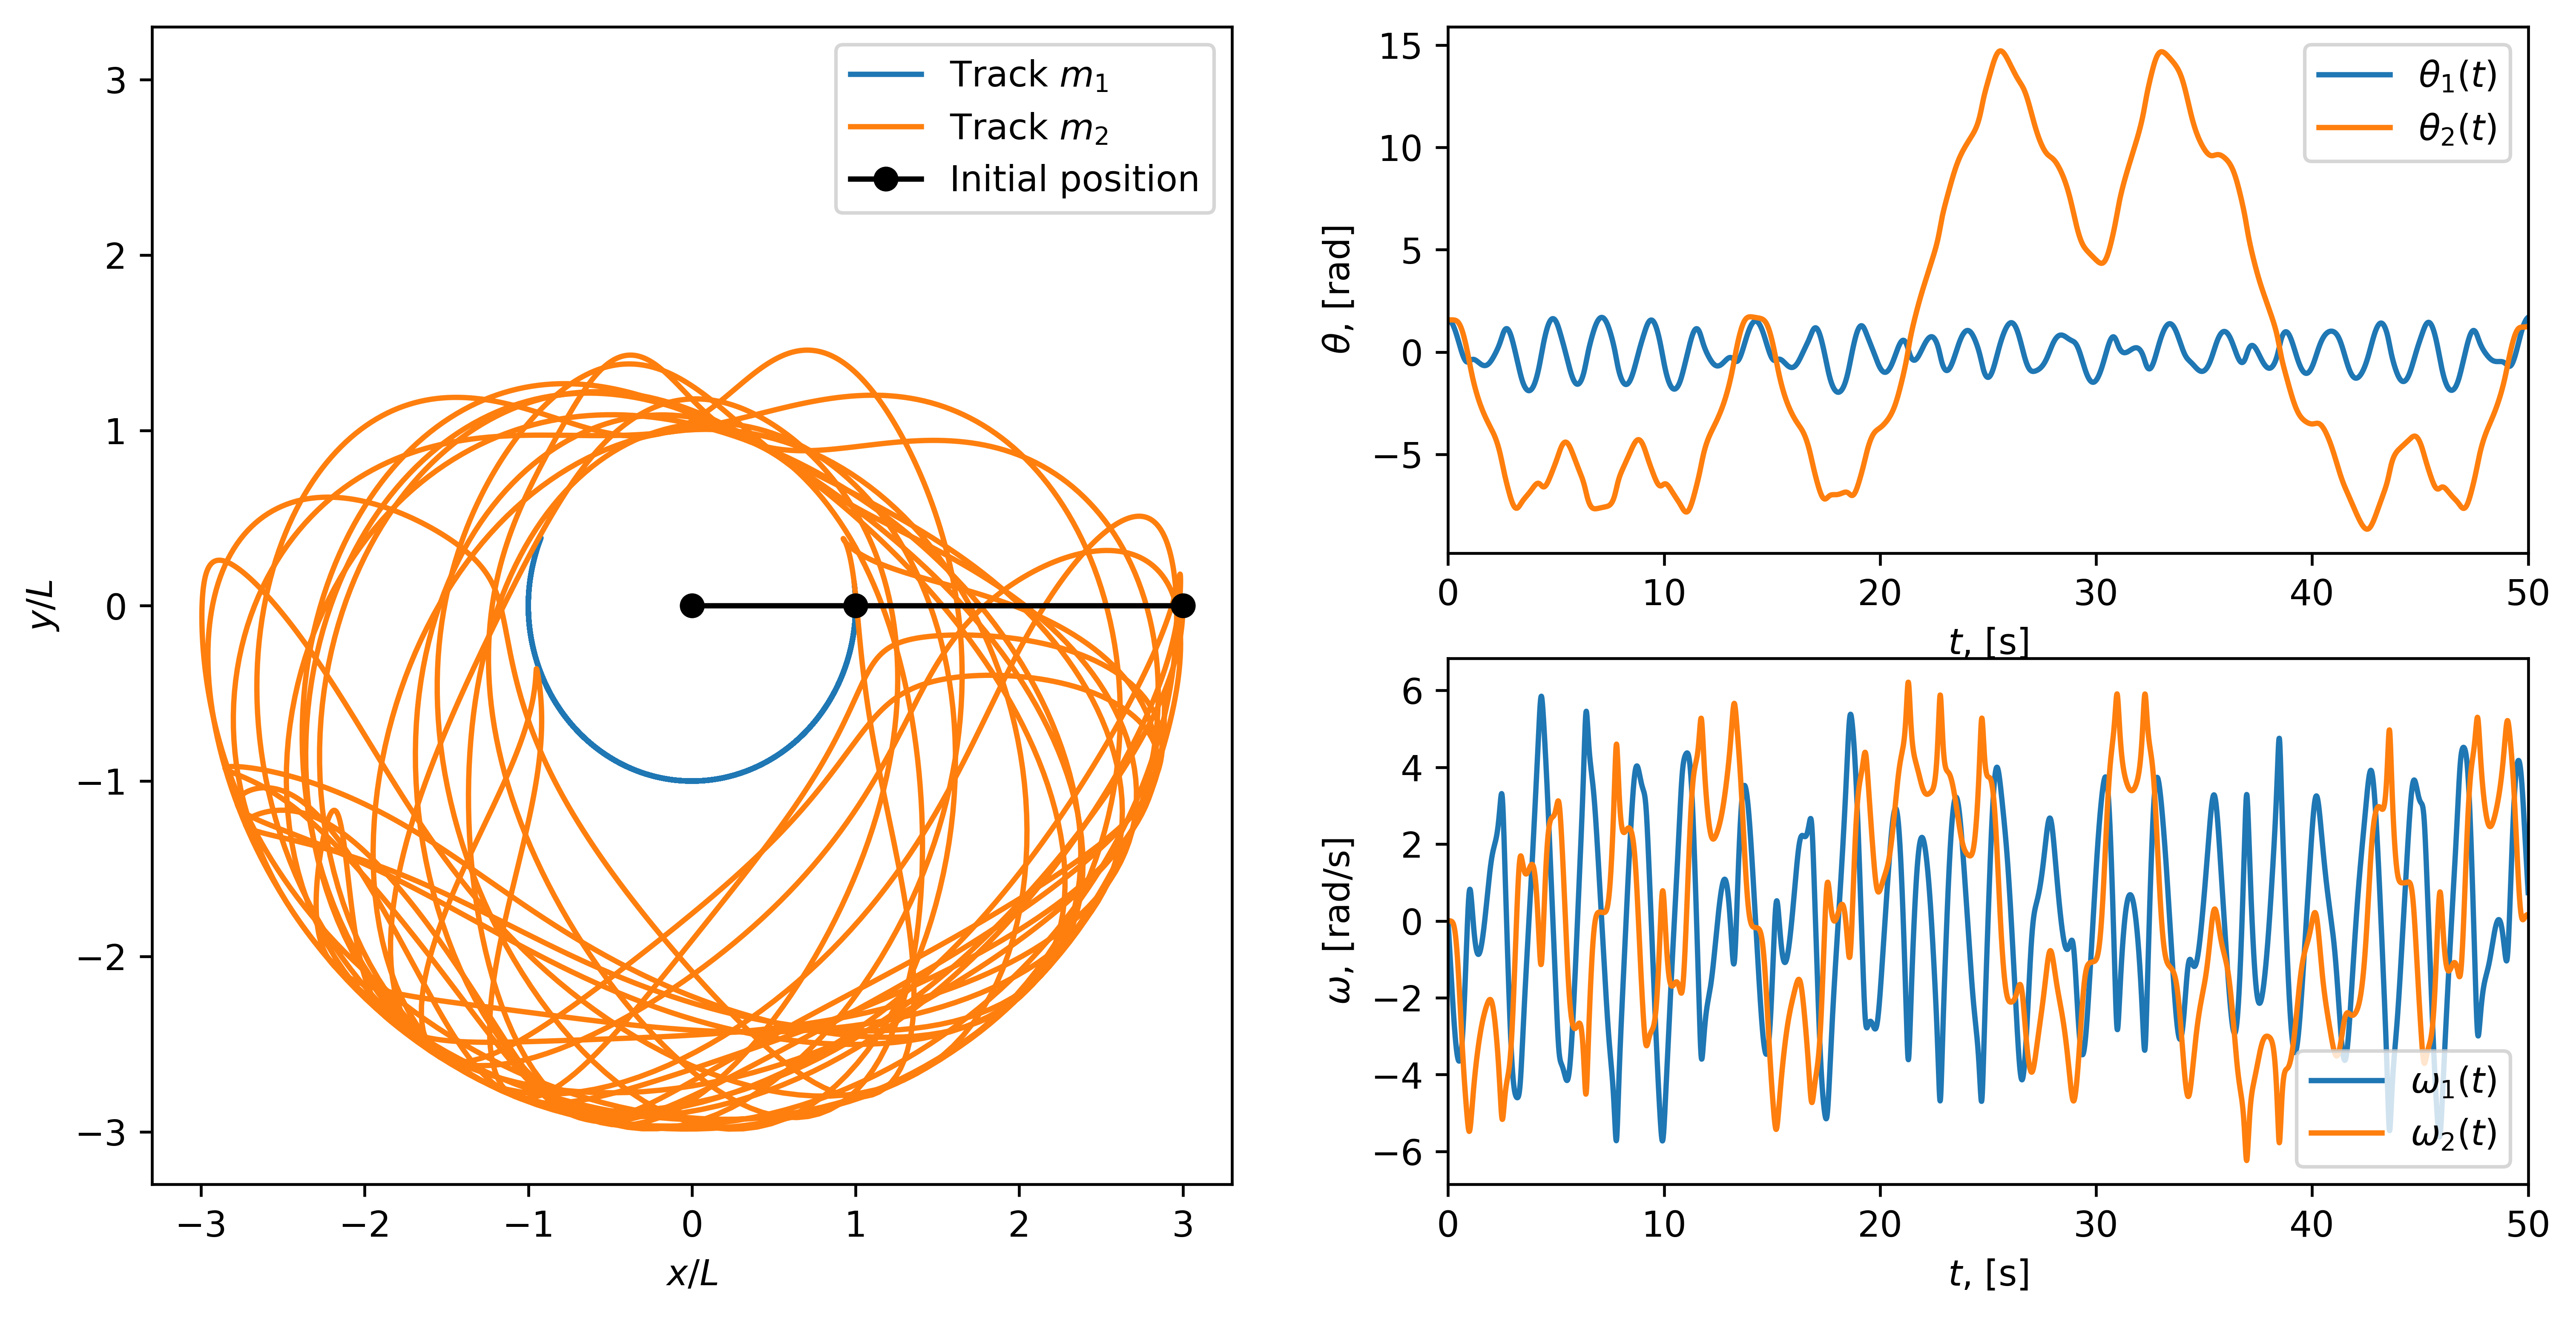

In [11]:
plot_position(x1, y1, x2, y2, theta1, theta2, t)

In [12]:
create_animation("double_pendulum", x1, y1, x2, y2, tmax, L1, L2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


As one can see, the result is quite chaotic and hard to interpret. Often, such complicated functions of time appear simpler in so-called *phase-space diagrams* [[2]](#rsc). We will delay further discussions on the motion until we have computed the phase-space diagram.

## Phase-Space Diagrams for the Simple Pendulum

Before analysing the phase-space diagrams for the double pendulum, we want to discuss phase-space diagrams for a more simple and ordered system. As an example, we will consider the simple pendulum, discussed in our notebook [Simple Pendulum](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/simple_pendulum.ipynb).

In [13]:
def RHS_simple(z, t, L, g):
    """ Return the right hand side of the 
    ordinary differential equation describing
    a simple pendulum.
    """
    theta, w = z
    wdot = -sin(theta)*g/L
    return w, wdot

A common solution to an equation of motion is a "position" $x(t)$ and a "velocity" $v(t)$. For the simple pendulum, this corresponds to $\theta(t)$ and $\omega(t)$. The plot $(\theta(t), \omega(t))$ is known as a *phase-space* plot. Let's create the phase-space plot for the simple pendulum for several initial conditions, and we will afterwards interpret and discuss the results. For simplicity, we let $\theta_0=0$ and $\omega_0$ vary.

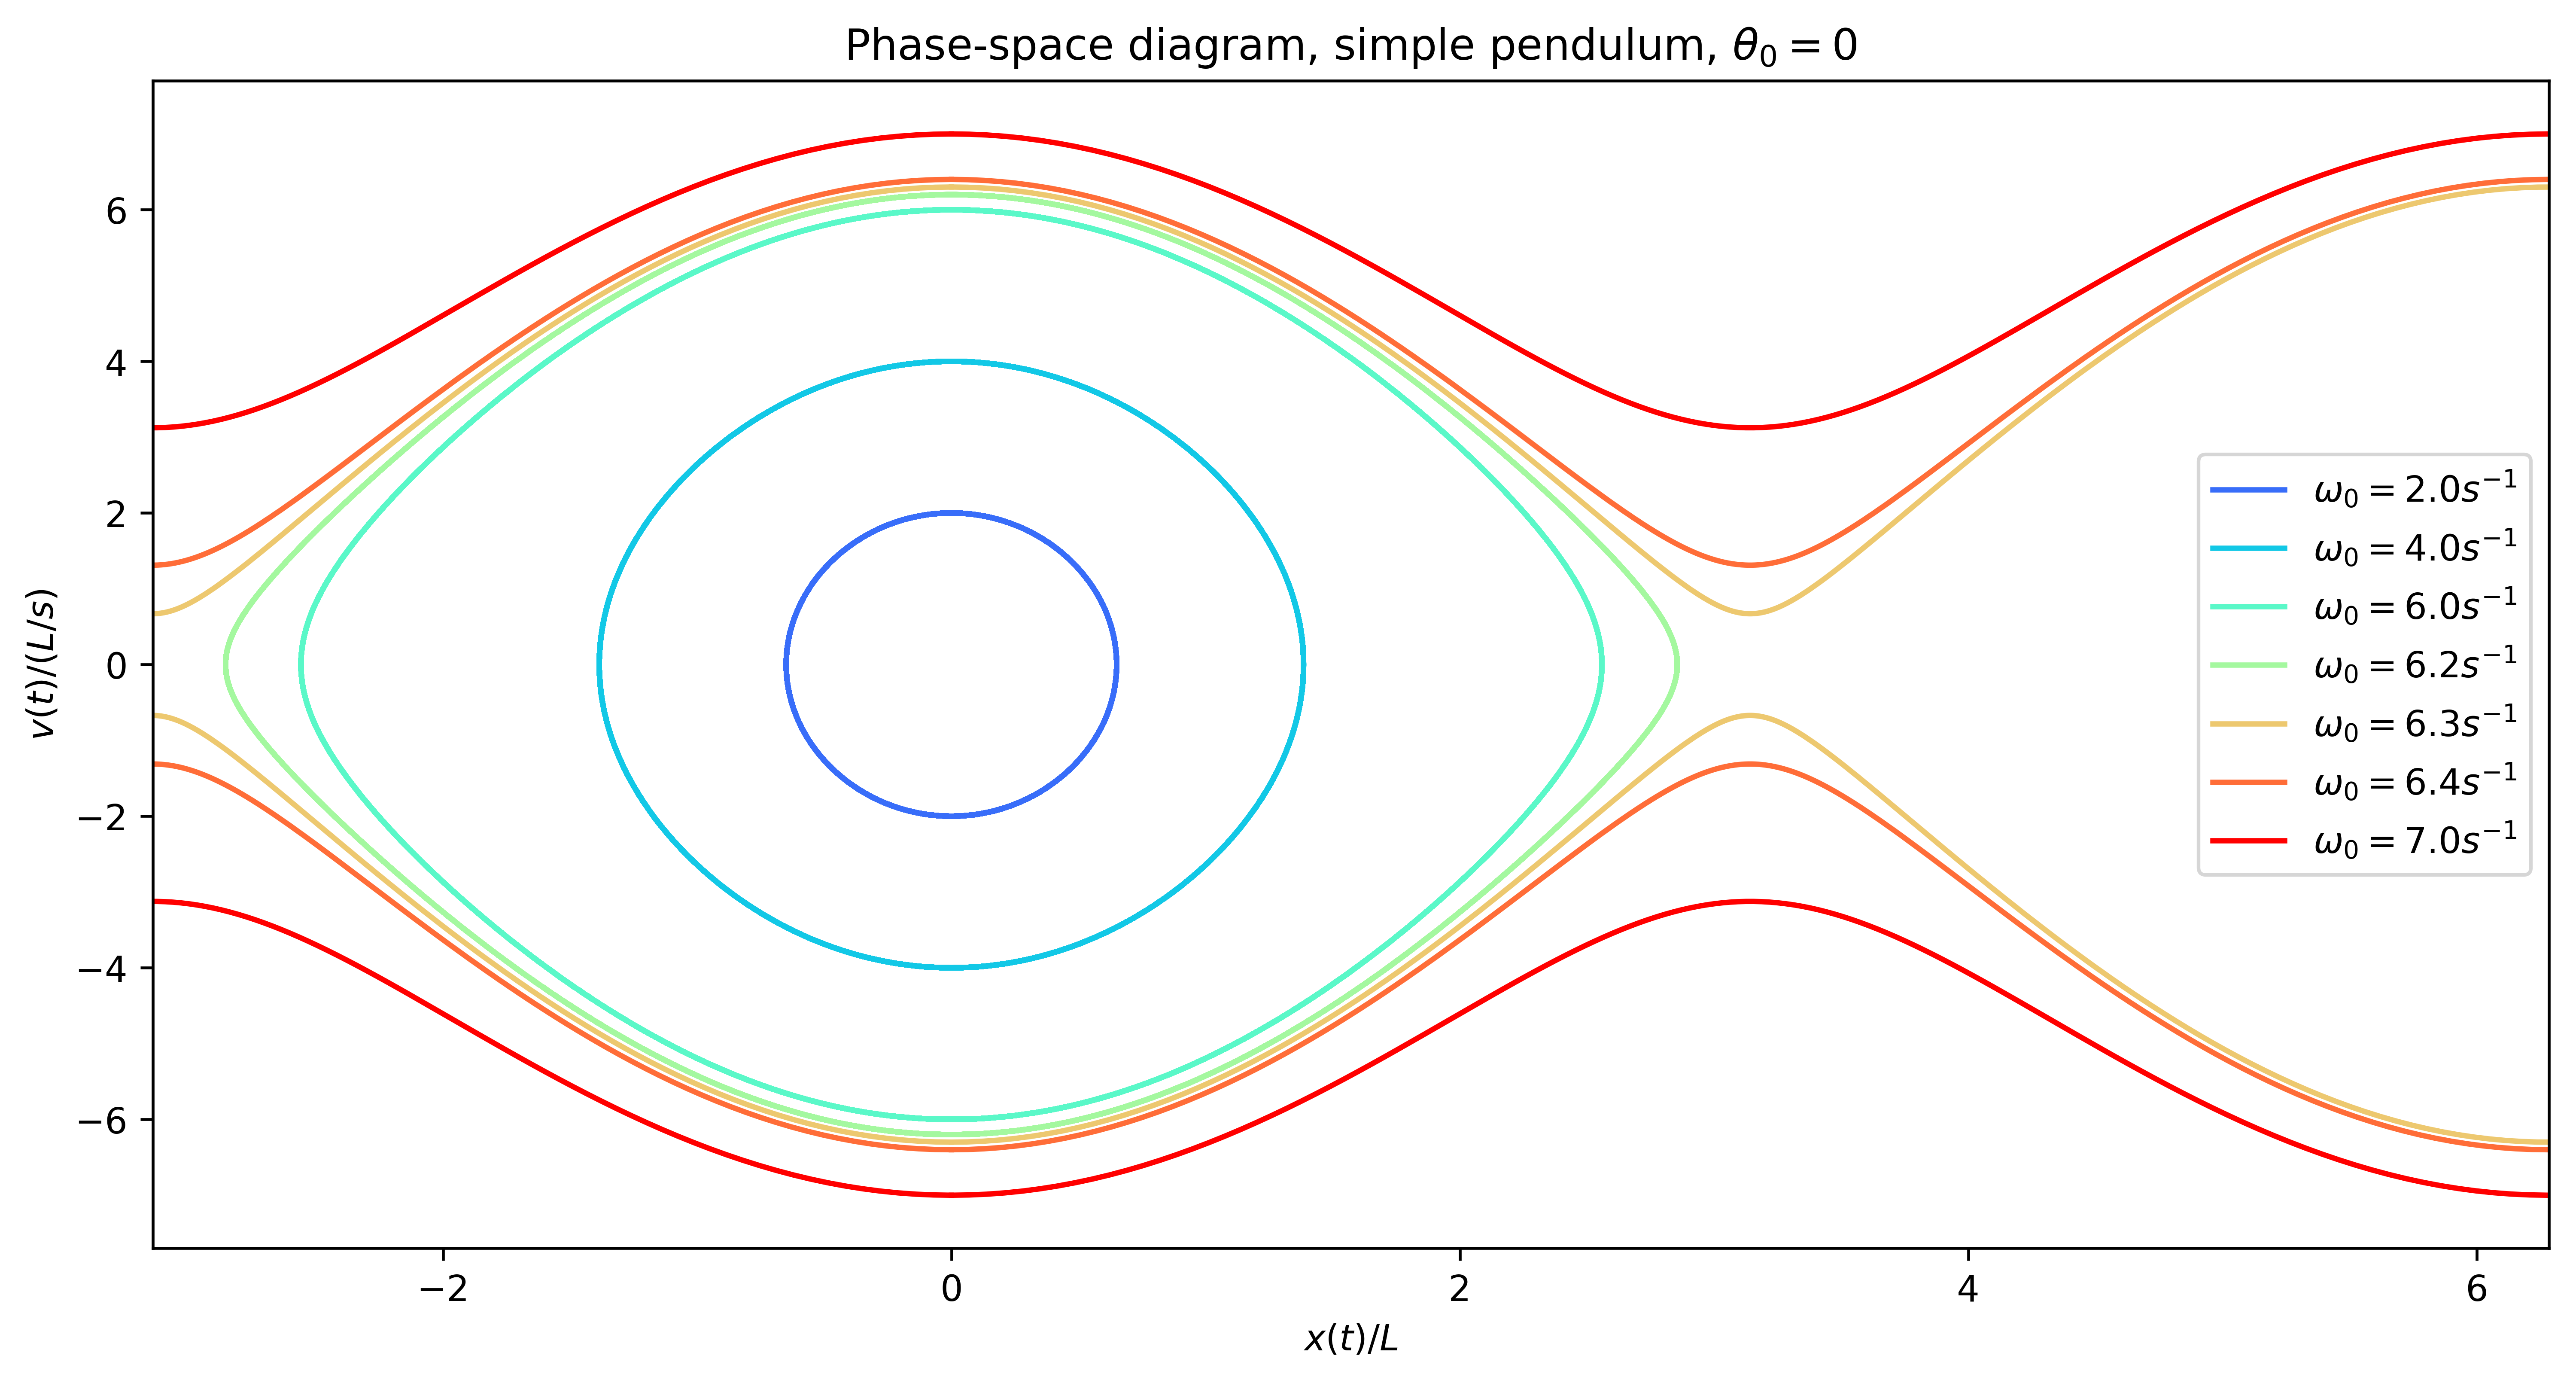

In [14]:
w0 = [2., 4., 6, 6.2, 6.3, 6.4, 7.]
L = 1.
g = 9.81
tmax_simp, dt_simp = 4, 0.01
t_simp = arange(0, tmax+dt, dt)

plt.figure(figsize=(2*figsize, figsize), dpi=dpi)
plt.title(r"Phase-space diagram, simple pendulum, $\theta_0=0$")
for i in range(len(w0)):
    z = odeint(RHS_simple, [0, w0[i]], t_simp, args=(L, g))
    theta_simp, w_simp = z[:,0], z[:,1]
    color = cm.rainbow(float(i + 1)/len(w0)) # Creating colormap
    plt.plot(theta_simp, w_simp, c=color, label=r"$\omega_0=%.1fs^{-1}$"%(w0[i]))
    plt.plot(theta_simp, -w_simp, c=color)
    plt.plot(-theta_simp, w_simp, c=color)
    plt.plot(-theta_simp, -w_simp, c=color)
plt.xlabel(r"$x(t)/L$")
plt.ylabel(r"$v(t)/(L/s)$")
plt.xlim([-pi, 2*pi])
plt.legend()
plt.show()

Although not completely shown, the phase-space diagram is periodic with period $2\pi$. Note the following about the phase-space diagram for the simple pendulum (see e.g. [[2]](#rsc) for more):

- For an harmonic potential, the phase space diagrams becomes ellipses (see exercise below). For small $\theta_\text{max}$, and thus small $\omega_0$, the potential for the simple pendulum are approximately harmonic and the phase space diagrams are thus ellipses for small $\omega_0$.
- For increasing $\omega_0$, the orbits become more anharmonic and get an increasingly distingct angular corners at $\theta(t)=\pm\pi$.
- The closed orbits corresponds to periodic oscillations, while open orbits corresponds to nonperiodic (or "running") motion.
- If we were to include friction, such as for the damped pendulum, the phase-space orbit will spiral into a fixed point.
- Different orbits do not cross, since the solution for different initial conditions are unique.

**Exercise: ** Prove that the phase-space diagrams for harmonic potentials are indeed ellipses. *Hint: Insert the equation of motion for the simple pendulum with $\theta_0\ll 1$ into the expression for the total mechanical energy.*  
**Exercise: ** Plot the phase-space diagram for the damped simple pendulum.

## Phase-Space Diagrams for the Double Pendulum

The motion of the double pendulum are much more complex than the simple pendulum. For convenience, we will only consider the motion of the mass $m_2$. Let's plot the phase-space diagram for the double pendulum discussed earlier. To this end, we will use the function `plot_phasespace()` as defined in the [appendix](#apndx).

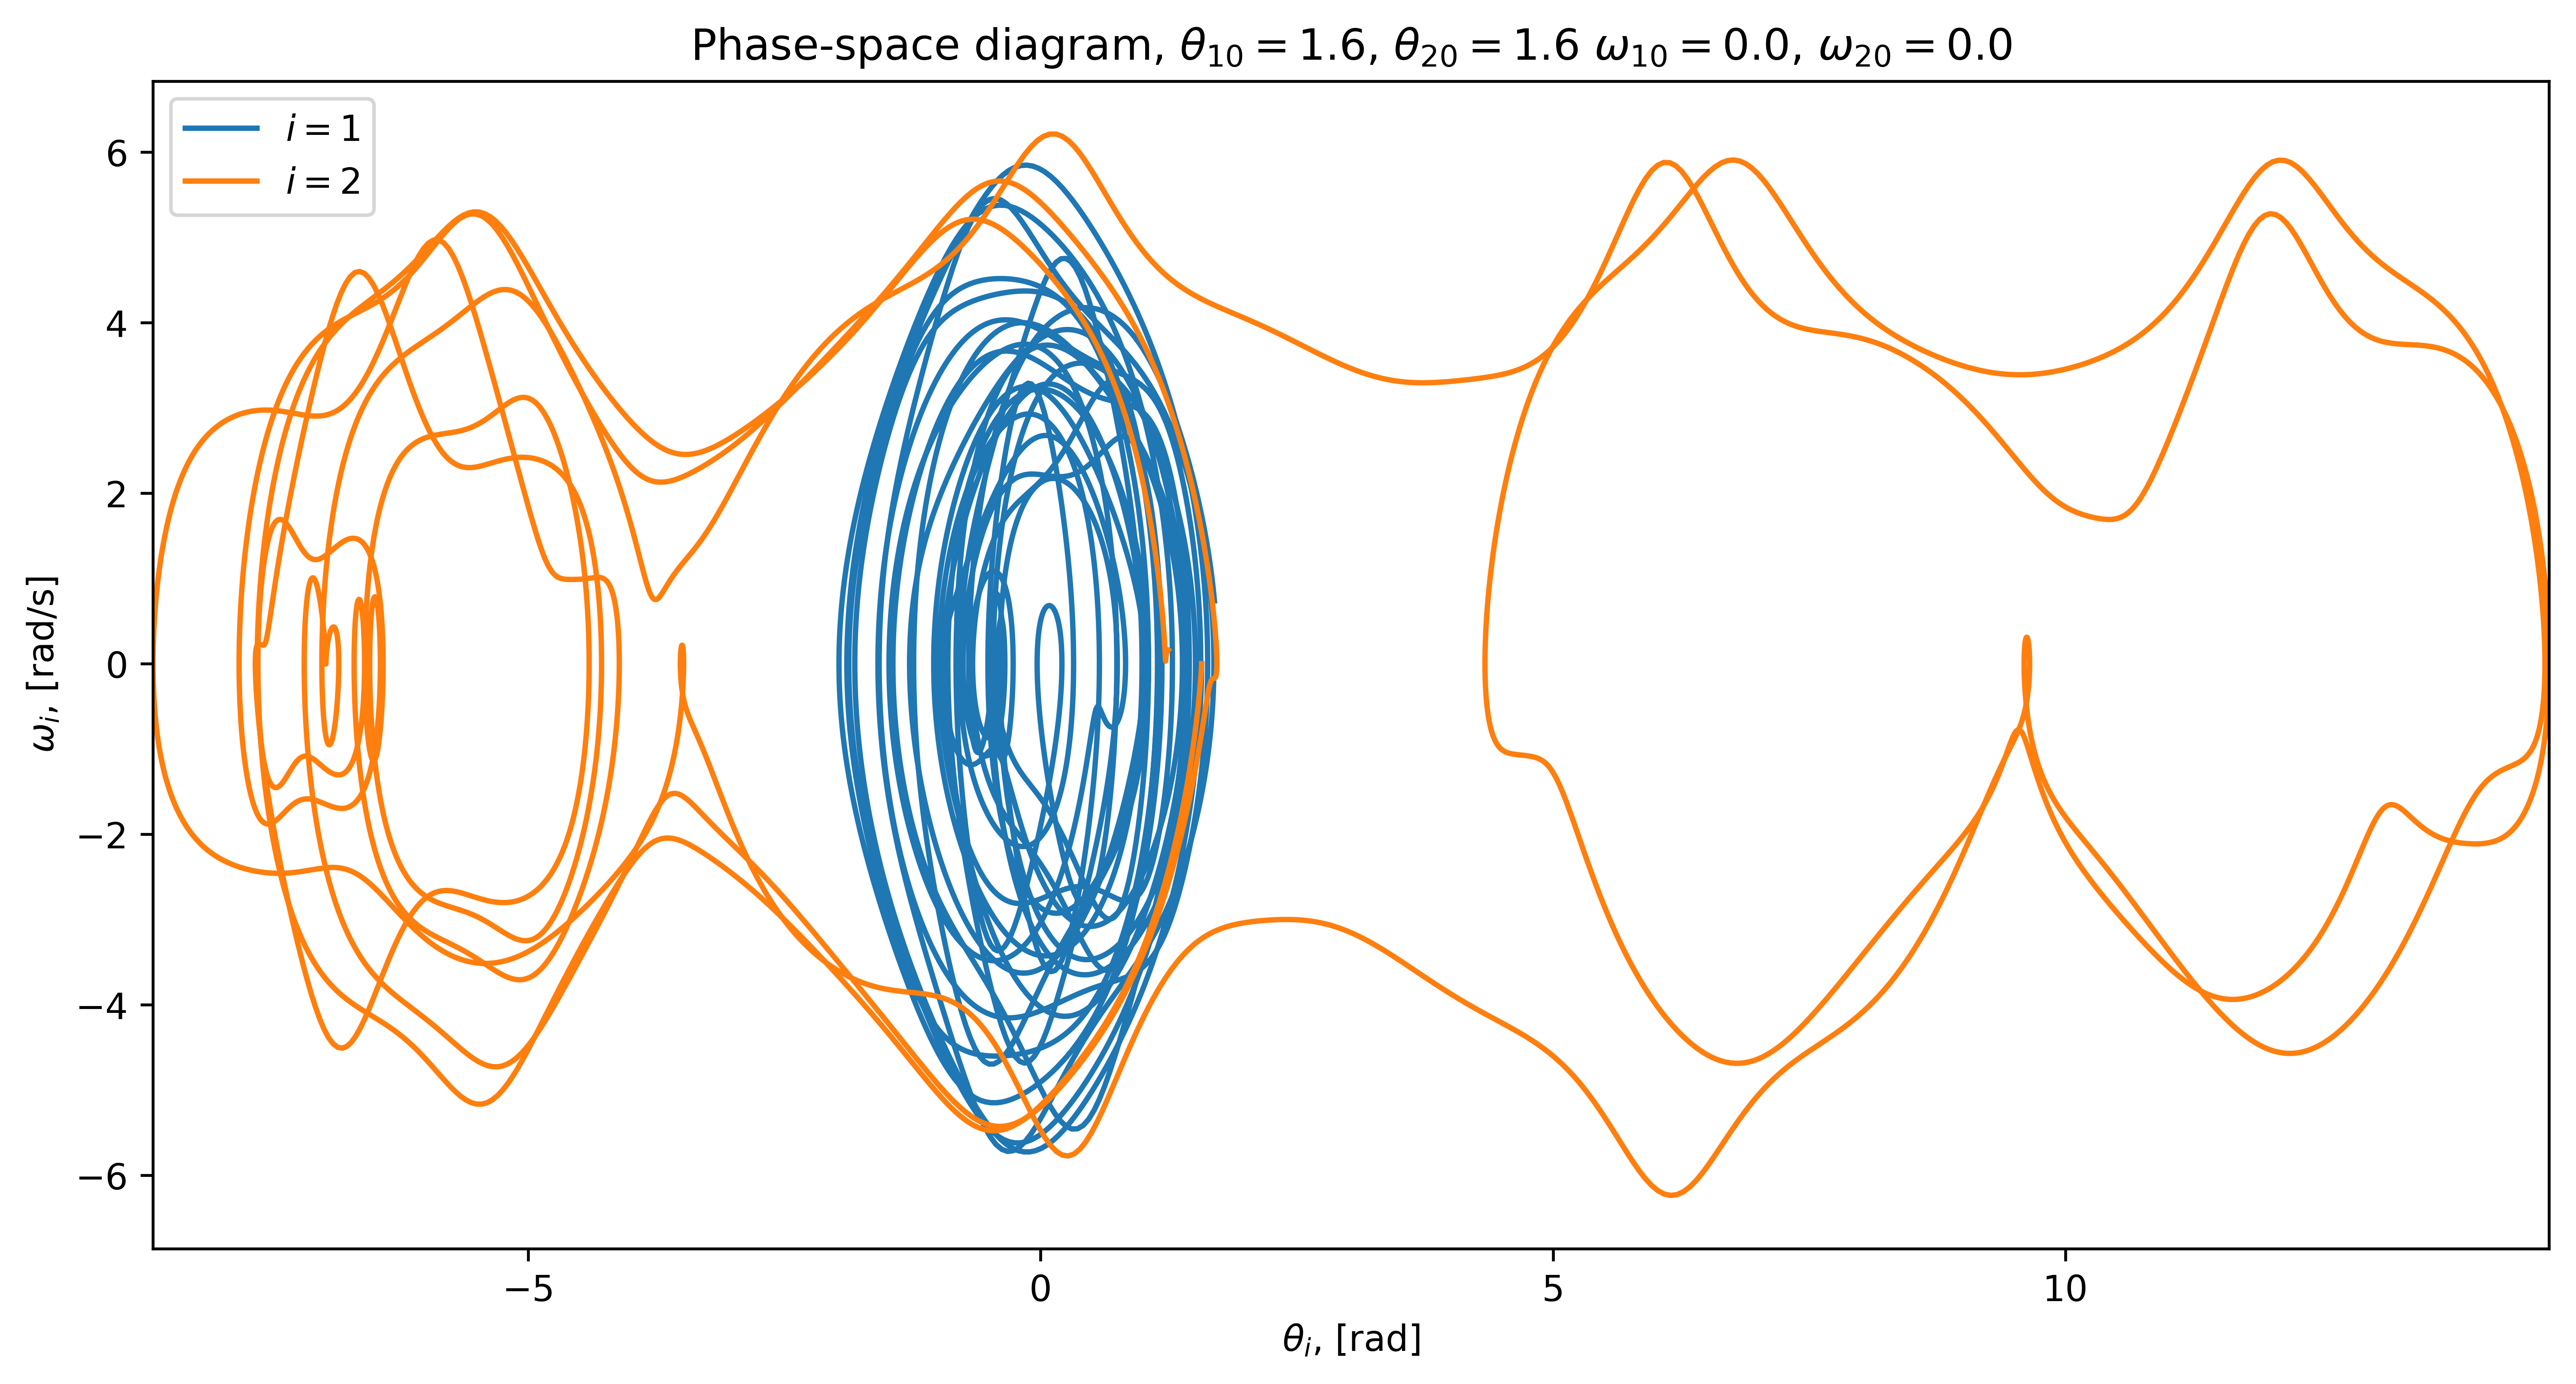

In [15]:
plot_phasespace(theta1, w1, theta2, w2)

Again, the motion of the double pendulum is clearly more complex than for the simple pendulum. However, some of the characteristics of the structure from the phase space diagram for the simple pendulum can be recognised. This is most easily seen in the phase-space orbit for $m_1$. Here, we can clearly see that there are several "elliptic-like" periodic structrures. The  trajectories do not remain in a single structure, but are in some sense attracted to them. The "randomness" leads to structures consisting of diffuse bands, rather than the single lines obtained in the case of the simple pendulum. This is what characterises *chaotic motion*. This is also the reason why the motion of the system is hypersensitive to change in initial conditions (try for youself!).

Note that the motion of mass $m_2$ has a larger tendency to rotate than $m_1$. In other words, $\theta_1$ increases faster than $\theta_2$ as a function of time. In this sense, the motion of mass $m_1$ is more "random".

Play around with other initial conditions!

## Conclusion
In this notebook, chaotic motion where introduced with the double pendulum as an example. Even though the motion of the system is chaotic, there are clear the phase-space structures. This means that there is an underlying order in the chaos.

## Further Work
- The motion is not chaotic for all initial conditions. Find a few examples.
- Implement the "driven damped pendulum" and perform the same analysis as above. In this system, energy can dissipate and other interesting phenomonon can arise, such as *predicable attractors* and *mode locking*.
- The system considered here has a four-dimensional parameter space $(\theta_1, \theta_2, \omega_1, \omega_2)$. This can be studied in more detail.
- Use Fourier analysis to analyse chaos.

<a id="rsc"></a>
## Resources and Further Reading
<a>[1]</a>: `scipy.integrate.odeint`, [scipy.org](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).  
<a>[2]</a>: Landau, R. H., Páez, M. J. and Bordeianu, C. C.: Computational Physics, 2nd edition, WILEY-VCH 2007.

___

<a id="apndx"></a>
# Appendix

### Equations of Motion
Consider the setup in figure [1](#im1). The posision of mass $m_1$ is

\begin{equation}
\begin{aligned}
x_1 &= L_1\sin\theta_1\\
y_1 &= -L_1\cos\theta_1.
\label{eq:pos1}
\end{aligned}
\end{equation}

The posision of mass $m_2$ can be expressed as

\begin{equation}
\begin{aligned}
x_2 &= x_1 + L_2\sin\theta_2\\
y_2 &= y_1 -L_2\cos\theta_2.
\label{eq:pos2}
\end{aligned}
\end{equation}

By using that $v_1^2 = \dot x_1^2 +\dot y_1^2$ and $v_2^2 = \dot x_2^2 +\dot x_2^2$ and equation \eqref{eq:pos1} and \eqref{eq:pos2}, it is easy to show that the kinetic energies of the masses becomes

\begin{equation}
\begin{aligned}
T_1 &= \frac{1}{2}m_1v_1^2 = \frac{1}{2}m_1L_1^2\dot\theta_1^2,\\
T_2 &= \frac{1}{2}m_2v_2^2 = \frac{1}{2}m_2\left(L_1^2\dot\theta_1^2 + L_2^2\dot\theta_2^2+2L_1L_2\cos(\theta_1-\theta_2)\dot\theta_1\dot\theta_2\right).
\end{aligned}
\label{eq:T}
\end{equation}

The potential energies are

\begin{equation}
\begin{aligned}
V_1 &= m_1gy_1 = -m_1gL_1\cos\theta_1,\\
V_2 &= m_2gy_2 = -m_2g\left(L_1\cos\theta_1+L_2\cos\theta_2\right).
\end{aligned}
\label{eq:V}
\end{equation}

We now form the Lagrangian $L=T-V = T_1+T_2-V_1-V_2$ from equation \eqref{eq:T} and \eqref{eq:V}, and insert it into the Euler-Lagrange equations given by

\begin{equation}
\frac{\partial L}{\partial \theta_1} = \frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial \dot\theta_1}
\label{eq:EL1}
\end{equation}

and

\begin{equation}
\frac{\partial L}{\partial \theta_2} = \frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial \dot\theta_2}.
\label{eq:EL2}
\end{equation}

Equation \eqref{eq:EL1} yields

\begin{equation}
-m_1gL_1\sin\theta_1-m_2L_1g\sin\theta_1 = (m_1+m_2)L_1^2\ddot\theta_1 + m_2L_1L_2\sin(\theta_1-\theta_2)\dot\theta^2 + m_2L_1L_2\cos(\theta_1 - \theta_2)\ddot\theta_2,
\end{equation}

while equation \eqref{eq:EL2} yields

\begin{equation}
-m_2gL_2\sin\theta_2 = m_2L_2^2\ddot\theta_2 + m_2L_1L_2\cos(\theta_1-\theta_2)\ddot\theta_1-m_2L_1L_2\sin(\theta_1-\theta_2)\dot\theta_1^2.
\end{equation}

If we solve for $\ddot\theta_1$ and $\ddot\theta_2$ we obtain after some manipulations

\begin{equation}
\begin{aligned}
\ddot\theta_1 &= \frac{1}{L_1\xi}\left[L_1m_2\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)\dot\theta_1^2 + L_2m_2\sin(\theta_1-\theta_2)\dot\theta_2^2 - m_2g\cos(\theta_1-\theta_2)\sin(\theta_2) + (m_1+m_2)g\sin(\theta_1) \right],\\
\ddot\theta_2 &= \frac{1}{L_2\xi}\left[L_2m_2\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)\dot\theta_2^2 + L_1(m_1+m_2)\sin(\theta_1-\theta_2)\dot\theta_1^2+(m_1+m_2)g\sin(\theta_1)\cos(\theta_1-\theta_2) - (m_1+m_2)g\sin(\theta_2) \right],\\
\end{aligned}
\label{eq:motion_1}
\end{equation}

with

\begin{equation}
\xi \equiv \cos^2(\theta_1-\theta_2)m_2-m_1-m_2.
\end{equation}

Equation \eqref{eq:motion_1} is the equations of motion for the double pendulum. It is convenient to introduce $\omega_i\equiv \dot\theta_i$ and reexpress the equations of motion as four first order differential equations.

### Plot functions
The three plotting function used to construct the plots in this notebook are given here.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.animation as animation

def plot_position(x1, y1, x2, y2, theta1, theta2, t):
    """ Plots the motion of the double pendulum in the
    xy-plane, as well as the angles and the angular
    velocities as a function of time.
    
    x1     : array-like, size(n,). x-posision of mass 1
    y1     : array-like, size(n,). y-posision of mass 1
    x2     : array-like, size(n,). x-posision of mass 2
    y2     : array-like, size(n,). y-posision of mass 2
    theta1 : array-like, size(n,). The first angle in the double pendulum
    theta2 : array-like, size(n,). The second angle in the double pendulum
    t      : array-like, size(n,). Time
    """
    plt.figure(figsize=(2*figsize, figsize), dpi=dpi)

    # xy-plot
    L = 1.1*(L1 + L2)
    ax = plt.subplot(2, 2, (1, 3), autoscale_on=False, xlim=(-L, L), ylim=(-L, L))
    ax.plot(x1, y1, label=r"Track $m_1$")
    ax.plot(x2, y2, label=r"Track $m_2$")
    ax.plot([0, x1[0], x2[0]], [0, y1[0], y2[0]], "-o", label="Initial position", c='k')
    plt.ylabel(r"$y/L$")
    plt.xlabel(r"$x/L$")
    ax.legend()

    # xt-plot
    ax = plt.subplot(2, 2, 2)
    ax.plot(t, theta1, label=r"$\theta_1(t)$")
    ax.plot(t, theta2, label=r"$\theta_2(t)$")
    plt.ylabel(r"$\theta$, [rad]")
    plt.xlabel(r"$t$, [s]")
    ax.legend()
    plt.xlim([0, np.max(t)])

    # yt-plot
    ax = plt.subplot(2, 2, 4)
    ax.plot(t, w1, label=r"$\omega_1(t)$")
    ax.plot(t, w2, label=r"$\omega_2(t)$")
    plt.ylabel(r"$\omega$, [rad/s]")
    plt.xlabel(r"$t$, [s]")
    plt.xlim([0, np.max(t)])
    ax.legend()

    plt.show()
    
def create_animation(filename, x1, y1, x2, y2, tmax, L1, L2):
    """ Creates an animation of the double pendulum.
    The animation is stored as a .gif and displayed.
    
    filename : string. Filename of the animation
    x1     : array-like, size(n,). x-posision of mass 1
    y1     : array-like, size(n,). y-posision of mass 1
    x2     : array-like, size(n,). x-posision of mass 2
    y2     : array-like, size(n,). y-posision of mass 2
    tmax   : array-like, size(n,). Final time
    L1, L2 : float. Length of rod 1 and 2
    """
    
    fig = plt.figure(figsize=(4, 4), dpi=60)
    L = 1.1*(L1 + L2)
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(-L, L), ylim=(-L, L))

    tail1, = ax.plot([],[],'r') # Tail for m2
    line, = ax.plot([], [], '-o', lw=2, c="k")
    time_template = r'$t = %.1fs$'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
    ax.set_aspect('equal')
    ax.axis('off')

    # Calculates the number of frames
    FPS = 15
    framesNum = int(FPS*tmax)
    frames = np.floor(np.linspace(0, len(x1) - 1, framesNum)).astype(np.int)

    def init():
        line.set_data([], [])
        tail1.set_data([], [])
        time_text.set_text('')
        return line, time_text

    def animate(i):
        line.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
        tail1.set_data(x2[:i], y2[:i])
        time_text.set_text(time_template % (i*dt))
        return line, time_text, tail1

    anim = animation.FuncAnimation(fig, animate, frames=frames)

    # Save animation. Try using "ffmpeg" if "imagemagick" does not work
    anim.save(filename + '.gif', writer='imagemagick', fps=FPS)

    # Close plot
    plt.close(anim._fig)

    # Display the animation
    with open(filename + '.gif','rb') as file:
        display(Image(file.read()))
        
def plot_phasespace(theta1, w1, theta2, w2):
    """ Creates a phase-space plot for the double pendulum
    for (theta, omega).
    
    theta1 : array-like, size(n,). The first angle in the double pendulum
    w1     : array-like, size(n,). Angular velocity of the first angle
    theta2 : array-like, size(n,). The second angle in the double pendulum
    w2     : array-like, size(n,). Angular velocity of the second angle
    """
    
    plt.figure(figsize=(2*figsize, figsize), dpi=dpi)
    plt.title(r"Phase-space diagram, $\theta_{10}=%.1f$, $\theta_{20}=%.1f$ "%(theta1[0], theta2[0])
             + r"$\omega_{10}=%.1f$, $\omega_{20}=%.1f$"%(w1[0], w2[0]))
    plt.plot(theta1, w1, label=r"$i=1$")
    plt.plot(theta2, w2, label=r"$i=2$")
    plt.legend()
    plt.xlabel(r"$\theta_i$, [rad]")
    plt.ylabel(r"$\omega_i$, [rad/s]")
    xlim = [np.min(theta1), np.max(theta1), np.min(theta2), np.max(theta2)]
    plt.xlim(np.min(xlim), np.max(xlim))
    plt.show()